In [ ]:
#DRIVE LINK
https://drive.google.com/drive/folders/1Js_0l5yWmTXvK69WSnvj6WfyahBaj2OS?usp=sharing

**NOTEBOOK 3**

**PREDICTING DATA**

Importing kaggle.json file.

Required for interacting with Kaggle.

In [ ]:
from google.colab import files
myfile=files.upload()

Saving kaggle.json to kaggle.json


Setting up environment virables, so that kaggle api can work properly.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Now, downloading the dataset from kaggle.

In [ ]:
!kaggle datasets download -d ritikakalra/ship-images

 88% 71.0M/80.9M [00:00<00:00, 107MB/s]
100% 80.9M/80.9M [00:00<00:00, 119MB/s]


Unzipping the downloaded data.

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/train/1/2835446.jpg  
  inflating: images/train/1/2835451.jpg  
  inflating: images/train/1/2835452.jpg  
  inflating: images/train/1/2835453.jpg  
  inflating: images/train/1/2835454.jpg  
  inflating: images/train/1/2835460.jpg  
  inflating: images/train/1/2835465.jpg  
  inflating: images/train/1/2835466.jpg  
  inflating: images/train/1/2835467.jpg  
  inflating: images/train/1/2835468.jpg  
  inflating: images/train/1/2835475.jpg  
  inflating: images/train/1/2835479.jpg  
  inflating: images/train/1/2835480.jpg  
  inflating: images/train/1/2835481.jpg  
  inflating: images/train/1/2835483.jpg  
  inflating: images/train/1/2835484.jpg  
  inflating: images/train/1/2835487.jpg  
  inflating: images/train/1/2835488.jpg  
  inflating: images/train/1/2835489.jpg  
  inflating: images/train/1/2835493.jpg  
  inflating: images/train/1/2835495.jpg  
  inflating: images/train/1/2835497.jpg  
  inflating: images/train

Importing the required libraries.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Downloading the model saved in previous notebook.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
my_dir="/content/drive/My Drive/projects/ship_classify"

In [ ]:
predictor = load_learner(my_dir)

Predicting on a separate test data. Passing the address of the image and not the image itself.

In [ ]:

def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

Predicting for a singe image.

In [ ]:
all_test_images=os.listdir("images/test/All")

Military


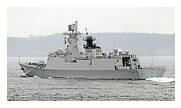

In [ ]:
idx=10
print(my_predictor("images/test/All/"+all_test_images[idx]))
img = open_image("images/test/All/"+all_test_images[idx])
img.show()

***Making video.***

In [ ]:
import cv2
test_files=os.listdir("images/test/All")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("images/test/All/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_PLAIN
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (255, 0, 0) 
  thickness = 1
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.FILLED) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 10 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.6)


In [ ]:
url = upload_public('my_final_output.mp4')

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=400 height=100 controls/>""")

In [ ]:
url

'https://drive.google.com/uc?id=1l331jftRqKgpd9_ytulxTC_u6356N5jt'